# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [1]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
df = df.replace(np.nan,0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [2]:
df = df[(df["SalePrice"] <= df["SalePrice"].quantile(.95)) & (df["SalePrice"] >= df["SalePrice"].quantile(.05))]

In [3]:
# y = df["price"]
# x = df[["bedrooms","sqft_lot"]]
def lr(x,y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

    m1 = model.fit(X_train, Y_train)

    y_test_prediction = model.predict(X_test)
    MSE = mean_squared_error(Y_test, y_test_prediction)
    RMSE = np.sqrt(mean_squared_error(Y_test, y_test_prediction))
    R2 = r2_score(Y_test, y_test_prediction)
    return MSE,RMSE,R2,m1.coef_,m1.intercept_
    

In [4]:
df["lnPrice"] = df["SalePrice"].apply(np.log)
y = df["lnPrice"]
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

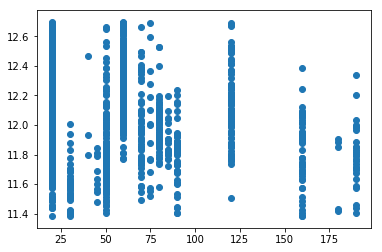

In [5]:
#plt.scatter(df["RoofMatl"].replace(0,""),df["lnPrice"])

plt.scatter(df["MSSubClass"],df["lnPrice"])


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lnPrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216


## neighborhood

In [7]:
df_neighborhoods= pd.get_dummies(df["Neighborhood"])


lr(x=df_neighborhoods, y = y )

(0.041158216494018816,
 0.20287487891313408,
 0.5570951774048454,
 array([1.46755165e+13, 1.46755165e+13, 1.46755165e+13, 1.46755165e+13,
        1.46755165e+13, 1.46755165e+13, 1.46755165e+13, 1.46755165e+13,
        1.46755165e+13, 1.46755165e+13, 1.46755165e+13, 1.46755165e+13,
        1.46755165e+13, 1.46755165e+13, 1.46755165e+13, 1.46755165e+13,
        1.46755165e+13, 1.46755165e+13, 1.46755165e+13, 1.46755165e+13,
        1.46755165e+13, 1.46755165e+13, 1.46755165e+13, 1.46755165e+13,
        1.46755165e+13]),
 -14675516472471.299)

## MSZoning

In [8]:
## MSZoning

df_MSZoning= pd.get_dummies(df["Neighborhood"])



lr(x=df_MSZoning, y = y )

(0.045828996794391896,
 0.21407708143188028,
 0.5391292858770371,
 array([3.21673989e+11, 3.21673989e+11, 3.21673989e+11, 3.21673989e+11,
        3.21673989e+11, 3.21673989e+11, 3.21673989e+11, 3.21673989e+11,
        3.21673989e+11, 3.21673989e+11, 3.21673989e+11, 3.21673989e+11,
        3.21673989e+11, 3.21673989e+11, 3.21673989e+11, 3.21673989e+11,
        3.21673989e+11, 3.21673989e+11, 3.21673989e+11, 3.21673989e+11,
        3.21673989e+11, 3.21673989e+11, 3.21673989e+11, 3.21673989e+11,
        3.21673989e+11]),
 -321673988915.5435)

## Sale Condition

In [9]:
df_SaleCondition= pd.get_dummies(df["SaleCondition"])


lr(x=df_SaleCondition, y = y )

(0.08994305543566274,
 0.29990507737559685,
 0.07060550119891584,
 array([-0.09081942, -0.20405425, -0.00251195, -0.07587469,  0.05668841,
         0.3165719 ]),
 11.95400866234076)

## Has Pool

In [10]:
df_hasPool = df["PoolArea"].apply(lambda x: 1 if x>0 else 0)


lr(x=np.array(df_hasPool).reshape(-1,1), y = y )

(0.10752912052397214,
 0.3279163315908071,
 0.00965341498329142,
 array([0.16700524]),
 12.020026207432736)

## HouseSTyle

In [11]:
df_HouseStyle = pd.get_dummies(df["HouseStyle"])


lr(x=df_SaleCondition, y = y )

(0.09107860425373099,
 0.3017923197394708,
 0.04701865591576315,
 array([-0.08797273, -0.21017414, -0.02322422, -0.05386196,  0.05432377,
         0.32090928]),
 11.954211326704112)

## OverallCond

In [12]:
df_OverallCond = pd.get_dummies(df["OverallCond"])


lr(x=df_OverallCond, y = y )

(0.06658102994023192,
 0.2580330016494633,
 0.10133128113839385,
 array([-0.19695878, -0.18066065,  0.17610236, -0.01600087,  0.0052305 ,
        -0.0087477 ,  0.22103514]),
 11.928139656477793)

## OverallQual

In [13]:
lr(x=pd.concat([df["OverallCond"], df["OverallQual"],df["OverallCond"] * df["OverallQual"]], axis=1), y = y )

(0.030957865395623573,
 0.1759484736950667,
 0.571728683029396,
 array([ 0.01765672,  0.20978392, -0.00292943]),
 10.751632968426811)

In [14]:
lr(x=pd.concat([df["OverallQual"]],axis=1),y=y)

(0.030881699347028863,
 0.17573189621417298,
 0.6438761857162001,
 array([0.19061823]),
 10.863695199116638)

In [15]:
lr(x=pd.concat([df["TotRmsAbvGrd"]],axis=1),y=y)

(0.06886082846001085,
 0.26241346851869257,
 0.2468873562405549,
 array([0.0827369]),
 11.485500920212141)

In [16]:
#Thermometer
#df_OverallQual.head()
df["OverallQual"]

0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
31       5
32       8
        ..
1427     5
1428     5
1429     6
1430     5
1431     6
1433     6
1434     5
1435     6
1436     4
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1316, dtype: int64

## Exterior Quality

In [17]:
df_ExterQual = pd.get_dummies(df["ExterQual"])


lr(x=df_ExterQual, y = y )

(0.04439849380403657,
 0.21070950098188873,
 0.48537985033315423,
 array([ 0.37227197, -0.36898722,  0.19124593, -0.19453068]),
 12.074618224993495)

In [18]:
lr(x=pd.concat([df_ExterQual,df_OverallQual],axis=1), y = y )

NameError: name 'df_OverallQual' is not defined

## Year Sold

In [19]:
df_YearSold = pd.get_dummies(df["YrSold"])


lr(x=df_YearSold, y =y )

(0.08533230111646024,
 0.2921169305542906,
 -0.00624356758473521,
 array([ 0.00224971,  0.0184989 , -0.00161323, -0.0122383 , -0.00689708]),
 12.021413808605319)

## BLDGType

In [20]:
df_BldgType = pd.get_dummies(df["BldgType"])


lr(x=df_BldgType, y = y )

(0.0802554474215345,
 0.2832939240815703,
 0.016722581010014004,
 array([ 0.13614832, -0.12503254, -0.11563536, -0.05597945,  0.16049902]),
 11.902851382352)

In [21]:
df["MasVnrType"]= df["MasVnrType"].replace(0,"")
df_MasVnrType = pd.get_dummies(df["MasVnrType"])


lr(x=df_MasVnrType, y = y )

(0.07114881157915504,
 0.2667373456776442,
 0.128671755498856,
 array([ 0.13975509, -0.24002263,  0.03853077, -0.14777319,  0.20950997]),
 12.081765289907338)

## ScreenPorch

In [22]:
df_hasScreenPorch = df["ScreenPorch"].apply(lambda x : 1 if x >0 else 0)
df_SP = pd.concat([df["ScreenPorch"],df_hasScreenPorch],axis=1 )


lr(x=df_SP, y = y )

(0.09672668507156286,
 0.3110091398521318,
 -0.028416805976662962,
 array([ 0.00129948, -0.13970505]),
 12.009015663700334)

In [23]:
df_Condition1 = pd.get_dummies(df["Condition1"])


lr(x=df_Condition1, y = y )


(0.07842393412950555,
 0.28004273625556786,
 0.06808374394230055,
 array([1.35638345e+12, 1.35638345e+12, 1.35638345e+12, 1.35638345e+12,
        1.35638345e+12, 1.35638345e+12, 1.35638345e+12, 1.35638345e+12,
        1.35638345e+12]),
 -1356383451077.6152)

LotShape

In [24]:
df_LotShape =  pd.get_dummies(df["LotShape"])



lr(x=df_LotShape, y = y )

(0.08539675855166938,
 0.29222723786750165,
 0.17943073932074483,
 array([-0.00103108,  0.05969596,  0.11679923, -0.17546411]),
 12.132178250393732)

## LotConfig

In [25]:
df_LandShape =  df["df_LandShape"y(lambda x : 1 if x >0 else 0)



lr(x=df_LotConfig, y = y )

SyntaxError: invalid syntax (<ipython-input-25-d6ddc6afc487>, line 1)

# Basics

In [26]:
lr(x=np.array(df["GarageCars"]).reshape(-1,1), y = y )

(0.05226312122848869,
 0.2286112884975033,
 0.3628858500761063,
 array([0.26871333]),
 11.548575334136803)

In [27]:
lr(x=np.array(df["Fireplaces"]).reshape(-1,1), y = y )

(0.07321601177458405,
 0.27058457416228304,
 0.1460885197934555,
 array([0.20736334]),
 11.895395067706112)

In [28]:
lr(x=np.array(df["MSSubClass"]).reshape(-1,1), y = y )

(0.08644113043713902,
 0.2940087251037612,
 0.0008094891201014809,
 array([-0.00040891]),
 12.041118634422629)

In [29]:
lr(x=df[["FullBath","HalfBath"]],y=y)

(0.05397592816951865,
 0.23232720066647092,
 0.32796651041173586,
 array([0.3183984 , 0.13068312]),
 11.474835935269558)

In [30]:

baths = df["BsmtFullBath"]+df["BsmtHalfBath"]+df["FullBath"]+df["HalfBath"]


lr(x=np.array(baths).reshape(-1,1), y = y )

(0.060252897819541476,
 0.24546465696621475,
 0.34418367644384606,
 array([0.20734868]),
 11.51788051290675)

In [31]:
df_roof= pd.get_dummies(df["RoofStyle"])
lr(x=df_roof, y = y )

(0.09225158171696438,
 0.30372945480635294,
 0.0033161900452185478,
 array([ 0.09279261, -0.12959003, -0.15102211, -0.06408407, -0.07955403,
         0.33145763]),
 12.136979275407962)

## Central Air

In [32]:
df['CentralAir']=df['CentralAir'].replace("N",0)
df['CentralAir']=df['CentralAir'].replace("Y",1)
lr(np.array(df["CentralAir"]).reshape(-1,1),y)

(0.09094224445500836,
 0.30156631850226306,
 0.0819228660737944,
 array([0.31988764]),
 11.713765595647883)

In [33]:
lr(np.array(df["BedroomAbvGr"]).reshape(-1,1),y)

(0.08385043164921335,
 0.2895693900418574,
 -0.016827833186758623,
 array([0.0608532]),
 11.847088803847829)

# SQFT Calcs

In [34]:
sq1f= df[["1stFlrSF"]]**0.5
f1 = pd.concat([sq1f,df["1stFlrSF"]],axis=1)
lr(f1, df["lnPrice"])

(0.08082867165286757,
 0.28430383685920874,
 0.23818368400322698,
 array([ 0.05627753, -0.00037788]),
 10.564065008822727)

In [35]:
sq2f= df[["2ndFlrSF"]]**0.5
f2 = pd.concat([sq2f,df["2ndFlrSF"]],axis=1)
lr(f2 , df["lnPrice"])

(0.05984825893817987,
 0.24463903805030765,
 0.2665227001777487,
 array([-0.03820082,  0.00144647]),
 11.983810309545367)

In [36]:
f12 = df["1stFlrSF"]+df["2ndFlrSF"]
euc_f12 = np.sqrt(df["1stFlrSF"]**2+df["2ndFlrSF"]**2)
lr(np.array(euc_f12).reshape(-1,1) , df["lnPrice"])

(0.05176618427790511,
 0.2275218325302104,
 0.43381930162262483,
 array([0.00058597]),
 11.271887005809436)

In [37]:
wd = df["WoodDeckSF"]
wd2 = wd**2
wd= pd.concat([wd,wd2],axis=1)
lr(wd, df["lnPrice"])

(0.08467832390857319,
 0.2909954018684371,
 0.13237442108839437,
 array([ 1.34871651e-03, -1.79353946e-06]),
 11.93765309424791)

In [38]:
sqfteq = pd.concat([df["1stFlrSF"],df["1stFlrSF"]**2,df["2ndFlrSF"],df["2ndFlrSF"]**2,df["1stFlrSF"]*df["2ndFlrSF"]],axis=1)

In [39]:
lr(sqfteq,y)

(0.03525403793868616,
 0.18776058675527768,
 0.5979812079505598,
 array([ 1.01107326e-03, -1.16600891e-07,  6.96263712e-04,  2.27049452e-07,
        -4.85834951e-07]),
 10.892112379147562)

## Multi

In [40]:
#df_neighborhoods, df_hasPool,df_SaleCondition,df_MSZoning

In [41]:
df_multi= pd.concat([df_neighborhoods,sqfteq,df_SP,df["GarageCars"],df["OverallQual"],baths, df["CentralAir"],\
                     df["TotRmsAbvGrd"],df["Fireplaces"],df["BedroomAbvGr"], df_hasPool ],axis=1)


lr(df_multi, df["lnPrice"])

(0.018258703796373926,
 0.1351247712167311,
 0.7922249734517421,
 array([ 4.24956678e+05,  4.24956560e+05,  4.24956495e+05,  4.24956674e+05,
         4.24956811e+05,  4.24956779e+05,  4.24956804e+05,  4.24956636e+05,
         4.24956749e+05,  4.24956654e+05,  4.24956548e+05,  4.24956713e+05,
         4.24956665e+05,  4.24956597e+05,  4.24956700e+05,  4.24956835e+05,
         4.24956846e+05,  4.24956598e+05,  4.24956651e+05,  4.24956688e+05,
         4.24956708e+05,  4.24956812e+05,  4.24956795e+05,  4.24956785e+05,
         4.24956825e+05,  6.41638842e-04, -1.17324463e-07,  2.35852344e-04,
         1.29161119e-07, -1.67657837e-07,  2.89282725e-04, -2.90022456e-02,
         4.35082332e-02,  7.75625373e-02,  5.16906211e-02,  1.04530574e-01,
        -4.17227973e-03,  2.96368337e-02, -1.19975230e-02,  8.34519861e-02]),
 -424946.0528774049)

In [42]:
df_multi1= pd.concat([df_MSZoning, sqfteq,df_SP,df["GarageCars"],df["OverallQual"],baths, df["CentralAir"],\
                     df["TotRmsAbvGrd"],df["Fireplaces"],df["BedroomAbvGr"], df_hasPool ],axis=1)


lr(df_multi1, df["lnPrice"])

(0.01265904920414831,
 0.11251244021950776,
 0.858534150151704,
 array([-1.05177891e+06, -1.05177903e+06, -1.05177908e+06, -1.05177889e+06,
        -1.05177878e+06, -1.05177881e+06, -1.05177877e+06, -1.05177894e+06,
        -1.05177884e+06, -1.05177892e+06, -1.05177904e+06, -1.05177888e+06,
        -1.05177892e+06, -1.05177899e+06, -1.05177890e+06, -1.05177876e+06,
        -1.05177874e+06, -1.05177899e+06, -1.05177893e+06, -1.05177890e+06,
        -1.05177887e+06, -1.05177879e+06, -1.05177881e+06, -1.05177881e+06,
        -1.05177875e+06,  6.65910182e-04, -1.27732298e-07,  2.61571462e-04,
         1.30712105e-07, -1.91583269e-07,  3.90146426e-04, -3.90274994e-02,
         4.85796143e-02,  7.81476378e-02,  5.17882832e-02,  1.01906445e-01,
        -5.85693450e-03,  2.81850020e-02, -1.00300657e-02,  7.18457540e-02]),
 1051789.5148361938)

In [43]:
df_Samir = df[["OverallQual", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF",  "GrLivArea", "TotRmsAbvGrd", "GarageArea"]]
lr(df_Samir,y)

(0.018439500144360715,
 0.13579212106878924,
 0.8208856575062264,
 array([ 1.24213504e-01,  4.90774664e-05,  7.33454095e-05, -6.96346817e-06,
         1.54840782e-04,  5.69537698e-03,  3.09923711e-04]),
 10.762677524772046)

In [44]:
df_multi.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,ScreenPorch,ScreenPorch,GarageCars,OverallQual,0,CentralAir,TotRmsAbvGrd,Fireplaces,BedroomAbvGr,PoolArea
0,0,0,0,0,0,1,0,0,0,0,...,0,0,2,7,4,1,8,0,3,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,6,3,1,6,1,3,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,7,4,1,6,1,3,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,3,7,2,1,7,1,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,8,4,1,9,1,4,0


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data

In [45]:
y = np.log(y)

In [47]:
y.describe()

count    1316.000000
mean        2.486279
std         0.025046
min         2.432305
25%         2.467859
50%         2.485032
75%         2.503955
max         2.541181
Name: lnPrice, dtype: float64